In [3]:
from astroquery.simbad import Simbad
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from urllib.parse import quote
%matplotlib inline

In [12]:
width = 150
height = 150
fov = 0.1

objects = ['M36', 'M16', 'M20', 'M51', 'M 33', 'M 101', 'M1', 'NGC 4676', 'NGC 5614', 'M82']
#objects = ['M1', 'M82']
hips_list = ('DSS2/red', 'CDS/P/AKARI/FIS/N160', 'PanSTARRS/DR1/z', 'AllWISE/W1')

nb_obj = len(objects)
nb_hips = len(hips_list)


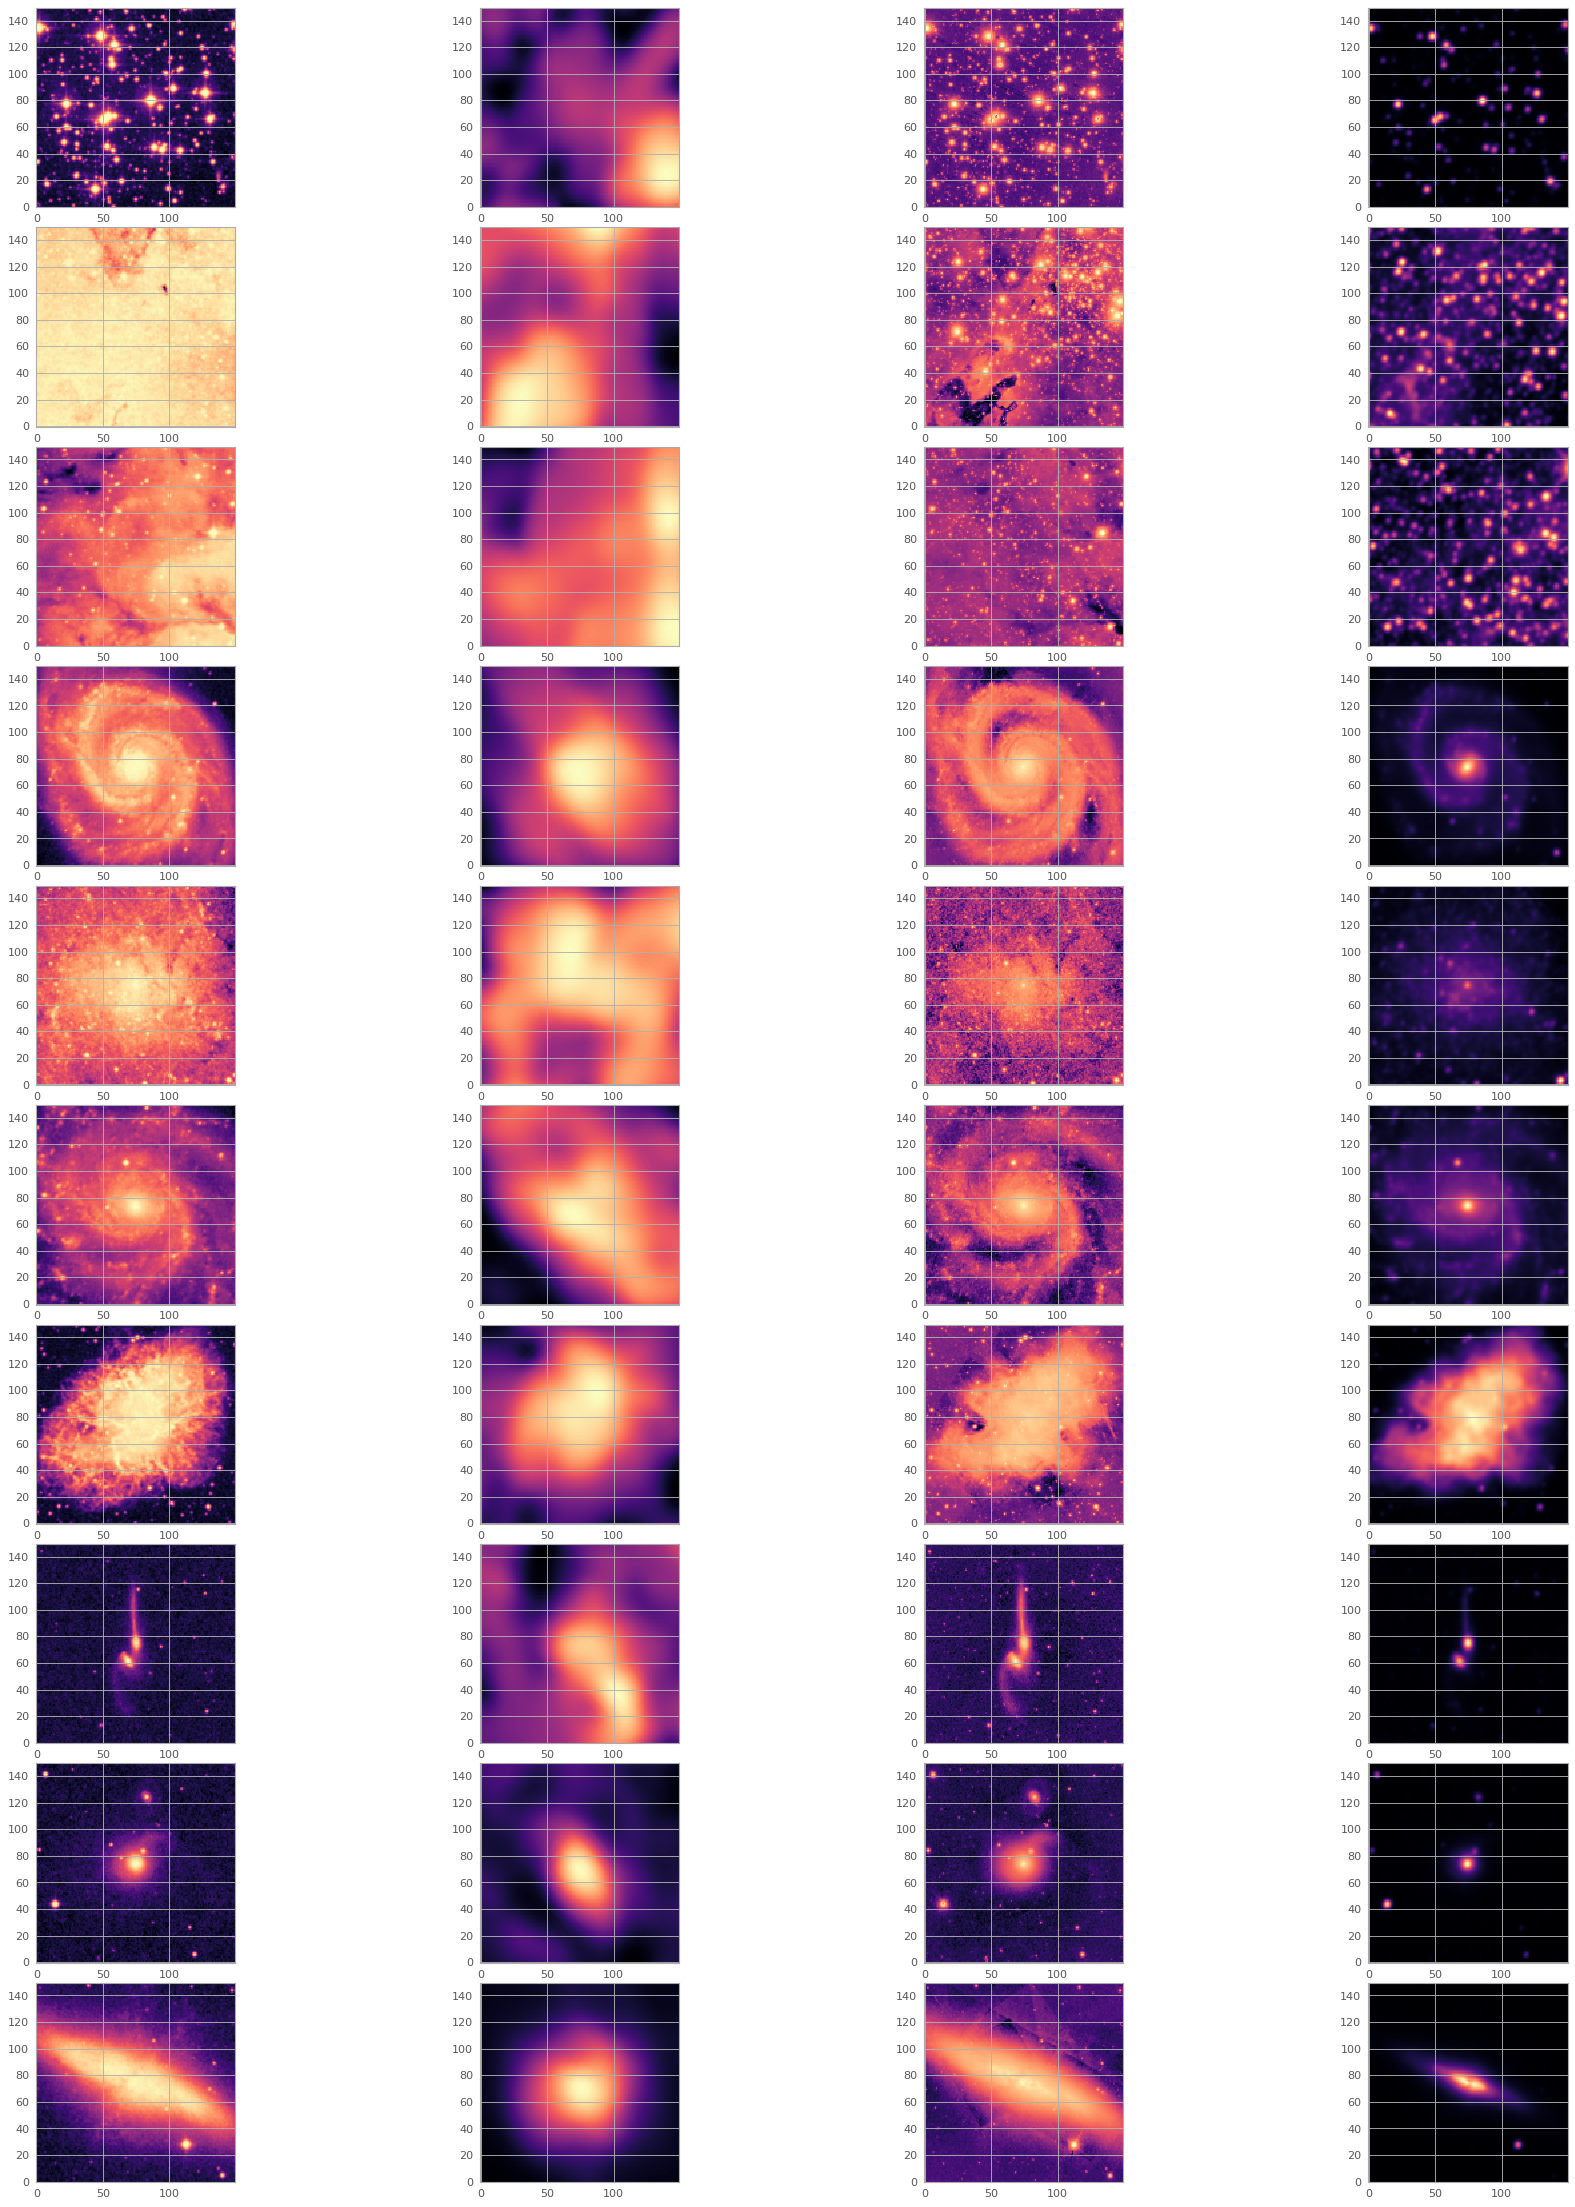

In [16]:
fig=plt.figure(figsize=(28, 36), dpi= 80, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.1, wspace=0.1)
from astropy.visualization import (MinMaxInterval, SqrtStretch, AsinhStretch,
                                   ImageNormalize)


i = 1
for gal in objects:
    for hips in hips_list:
        plt.subplot(nb_obj, nb_hips, i)
        sc = SkyCoord.from_name(gal)
        ra = sc.icrs.ra.deg
        dec = sc.icrs.dec.deg
        url = 'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips={}&width={}&height={}&fov={}&projection=TAN&coordsys=icrs&ra={}&dec={}'.format(quote(hips), width, height, fov, ra, dec)
        hdu = fits.open(url)
        
        im = hdu[0].data
        # Create an ImageNormalize object
        norm = ImageNormalize(im, interval=MinMaxInterval(),
                      stretch=AsinhStretch())
        plt.imshow(im, cmap='magma', norm=norm, origin='lower')
#        plt.colorbar()
        
        i += 1

In [11]:
# make method to be able to request N cutouts in M HiPS
# async, giving output directory, with method to follow the progress
